<a href="https://colab.research.google.com/github/jojoconverteo/Evaneos/blob/main/Evaneos_Churn_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://www.offremedia.com/sites/default/files/vignette/article/converteo-logo.png)

# **Churn : Apprentissage supervisé**




**Contexte** : On cherche à savoir si un client est à risque de désengagement

-------------------------------

**Dictionnaire :**

Churn (Cible) :
-  1 if customer cancelled service, 0 if not

AccountWeeks : 
- number of weeks customer has had active account


DataPlan : 
- 1 if customer has data plan, 0 if not

DataUsage : 
 - gigabytes of monthly data usage


CustServCalls : 
- number of calls into customer service


DayMins :
- average daytime minutes per month


DayCalls : 
- average number of daytime calls


MonthlyCharge :
- average monthly bill


OverageFee :
- largest overage fee in last 12 months

ContractRenewal :
- 1 if customer recently renewed contract, 0 if not


RoamMins : 
- average number of roaming minutes [LE ROAMING, C'EST QUOI ?](https://www.sfrbusiness.fr/room/communications-unifiees/roaming-c-est-quoi.html)

In [1]:
#@title


!pip install plotly --upgrade
!pip install -U pandas_profiling

from pandas_profiling import ProfileReport
from google.colab import drive
import os 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import typing
from typing import List
import numpy as np


import warnings
warnings.filterwarnings('ignore')

def func_create_noise(df_train_data: pd.DataFrame, coloumns_cat_2_category: List) -> pd.DataFrame:
  """
  Fonction qui permet de creer du bruit


  Parameters:
  ----------------------------
    df_train_data: pd.DataFrame 
    Dataframe d'entree 


  Return:
  -----------------------------
    df_train_data_suffle: pd.DataFrame
    Dataframe modifier  

  """
  dict_create_noise_columns_cat = {1 : 'Yes', 0 : 'No'}
  df_train_data_suffle = df_train_data.sample(frac=1)

  for col in columns_cat_2_category: 
    df_train_data_suffle[col] = df_train_data_suffle[col].apply(lambda x: dict_create_noise_columns_cat[x])

  return df_train_data_suffle




drive.mount('/content/drive')
sep = os.sep
str_path_to_file = f"/content/drive/My Drive/Cours Data/Classification/Data/telecom_churn.csv"

df_train_data_suffle = pd.read_csv(str_path_to_file, encoding='ascii')

columns_cat_2_category=['Churn', 'ContractRenewal', 'DataPlan']
df_train_data_suffle = func_create_noise(df_train_data_suffle, columns_cat_2_category)
df_train_data_suffle = df_train_data_suffle.sample(frac=1)

df_train_data_suffle_cat = df_train_data_suffle.select_dtypes(include=object)
df_train_data_suffle_num = df_train_data_suffle.select_dtypes(exclude=object)

df_train_data_one_hot_encoding = pd.get_dummies(df_train_data_suffle_cat, drop_first=True)

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.12.0)
Requirement already up-to-date: pandas_profiling in /usr/local/lib/python3.6/dist-packages (2.9.0)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Partie 1 :** Régression logistique

In [2]:
#@title

df_train_data_suffle.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3264,No,89,Yes,Yes,1.59,0,97.8,98,50.9,10.36,5.9
1797,No,92,Yes,Yes,2.75,0,141.6,95,69.5,10.40,10.2
2119,Yes,111,Yes,No,0.00,0,249.8,109,64.0,12.12,11.6
714,No,168,Yes,Yes,1.97,2,175.9,70,67.7,10.59,7.3
1479,No,66,Yes,Yes,2.40,1,174.7,92,74.0,11.61,8.9


In [3]:
#@title

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

df_train_data_classification = pd.concat([df_train_data_suffle_num, df_train_data_one_hot_encoding], axis=1)
X, Y = df_train_data_classification.drop('Churn_Yes', axis=1), df_train_data_classification[['Churn_Yes']]
sk_scaler = StandardScaler()
sk_scaler.fit(X)
X_scaled = sk_scaler.transform(X)

In [4]:
#@title

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)                                                
logistic_clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [5]:
#@title

from sklearn.metrics import accuracy_score

y_pred = logistic_clf.predict(X_test)

str_pourcentage = f"Prédiction en pourcentage : {accuracy_score(y_test, y_pred)} \n"
str_count = f"Prédiction en nombre : {accuracy_score(y_test, y_pred, normalize=False)} / {len(y_pred)} \n"

print("".join([str_pourcentage, str_count]))

Prédiction en pourcentage : 0.8654545454545455 
Prédiction en nombre : 952 / 1100 



In [6]:
#@title

from sklearn.model_selection import cross_val_score


logistic_clf = LogisticRegression(random_state=0)
skl_cross_val = cross_val_score(logistic_clf, X, Y, cv=5)

array_cross_val = skl_cross_val
mean_cross_val = skl_cross_val.mean()

print(f"Resultat CrossVal {array_cross_val} \nMoyenne CrossVal {mean_cross_val}")

Resultat CrossVal [0.85757121 0.86206897 0.83808096 0.85285285 0.85285285] 
Moyenne CrossVal 0.852685369027198





### Matrice de confusion

![](https://user.oc-static.com/upload/2017/03/02/14884666421501_P2C1-1.png)



***Rappel & Precision :***

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Precisionrappel.svg/350px-Precisionrappel.svg.png)

*La précision :* va mesurer parmis toutes les prévisions combien de fois mon algorithme a raison
 
*Le rappel :* va mesurer parmi tous les exemples positifs combien mon algorithme va en capter.


In [7]:
#@title

from sklearn.metrics import confusion_matrix

array_conf_mat = confusion_matrix(y_test, y_pred)

fig = px.imshow(array_conf_mat, title="Matrice de confusion")
fig.show()

from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, *args = score(y_test, y_pred)

list_columns = ['Precision', 'Rappel']
df_precision_recall = pd.DataFrame(columns=list_columns)
df_precision_recall['Precision'] = precision
df_precision_recall['Rappel'] = recall

print("Precision & Rappel :\n")
df_precision_recall

Precision & Rappel :



,Precision,Rappel
0,0.886990,0.969886
1,0.382979,0.131387


In [8]:
df_churn = pd.DataFrame(df_train_data_suffle_cat.Churn.value_counts().reset_index())
fig = px.bar(df_churn, x='index', y='Churn')
fig.show() 

In [9]:
#@title

logistic_clf = LogisticRegression(random_state=0)
skl_cross_val = cross_val_score(logistic_clf, X, Y, cv=5, n_jobs=-1, scoring='roc_auc')

array_cross_val = skl_cross_val
mean_cross_val = skl_cross_val.mean()

print(f"Resultat CrossVal {array_cross_val} \nMoyenne CrossVal {mean_cross_val}")

Resultat CrossVal [0.77386508 0.81405317 0.82155905 0.80674342 0.76469298] 
Moyenne CrossVal 0.7961827410019895


### Undersampling

In [10]:
#@title

from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 10})
X_cc, y_cc = cc.fit_sample(X, Y)

logistic_clf = LogisticRegression(random_state=0)
skl_cross_val = cross_val_score(logistic_clf, X_cc, y_cc, cv=5, n_jobs=-1, scoring='roc_auc')

array_cross_val = skl_cross_val
mean_cross_val = skl_cross_val.mean()

print(f"Resultat CrossVal {array_cross_val} \nMoyenne CrossVal {mean_cross_val}")

Resultat CrossVal [0.79896907 0.81958763 0.80927835 0.84895833 0.84375   ] 
Moyenne CrossVal 0.824108676975945


### Oversampling

In [11]:
#@title

from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, Y)

logistic_clf = LogisticRegression(random_state=0)
skl_cross_val = cross_val_score(logistic_clf, X_sm, y_sm, cv=5, n_jobs=-1, scoring='roc_auc')

array_cross_val = skl_cross_val
mean_cross_val = skl_cross_val.mean()

print(f"Resultat CrossVal {array_cross_val} \nMoyenne CrossVal {mean_cross_val}")

Resultat CrossVal [0.82050785 0.83144968 0.83478609 0.84606648 0.85026162] 
Moyenne CrossVal 0.8366143428747306


### Oversampling + Undersampling

In [12]:
#@title

from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, Y)

logistic_clf = LogisticRegression(random_state=0)
skl_cross_val = cross_val_score(logistic_clf, X_smt, y_smt, cv=5, n_jobs=-1, scoring='roc_auc')

array_cross_val = skl_cross_val
mean_cross_val = skl_cross_val.mean()

print(f"Resultat CrossVal {array_cross_val} \nMoyenne CrossVal {mean_cross_val}")

Resultat CrossVal [0.82307613 0.82769959 0.83398326 0.83488092 0.8429036 ] 
Moyenne CrossVal 0.8325087014452757


In [13]:
#@title

logistic_clf = LogisticRegression(random_state=0).fit(X_smt, y_smt)

list_coef = [float(w) for w in logistic_clf.coef_[0]]
list_name_columns = [w for w in X.columns]

df_interpretation = pd.DataFrame(columns=['Coefficient', 'Nom_colonnes'])

df_interpretation['Coefficient'] = list_coef
df_interpretation['Nom_colonnes'] = list_name_columns

fig = px.bar(df_interpretation, y='Coefficient', x='Nom_colonnes')
fig.show()

In [14]:
#@title

logistic_clf = LogisticRegression(random_state=0).fit(X_smt, y_smt)

list_coef_Churn = [float(np.exp(w)) for w in logistic_clf.coef_[0]]
list_coef_NoChurn = [1/w for w in list_coef_Churn]

list_name_columns = [w for w in X.columns]

df_interpretation = pd.DataFrame(columns=['Coefficient', 'Nom_colonnes'])

df_interpretation['Coefficient'] = list_coef_Churn
df_interpretation['Nom_colonnes'] = list_name_columns
fig = px.bar(df_interpretation, y='Coefficient', x='Nom_colonnes', title="Odds ratio Churn/No_Churn")
fig.show()

df_interpretation['Coefficient'] = list_coef_NoChurn
fig = px.bar(df_interpretation, y='Coefficient', x='Nom_colonnes', title="Odds ratio NoChurn/Churn")
fig.show()

## **Partie 2 :** Random Forest & Gradient Boosting
 
---------------------------
 

 



In [15]:
#@title

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X_oversampling = pd.DataFrame(X_smt, columns=X.columns)
y_oversampling = pd.DataFrame(y_smt, columns=['Churn'])

tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(X_oversampling, y_oversampling)

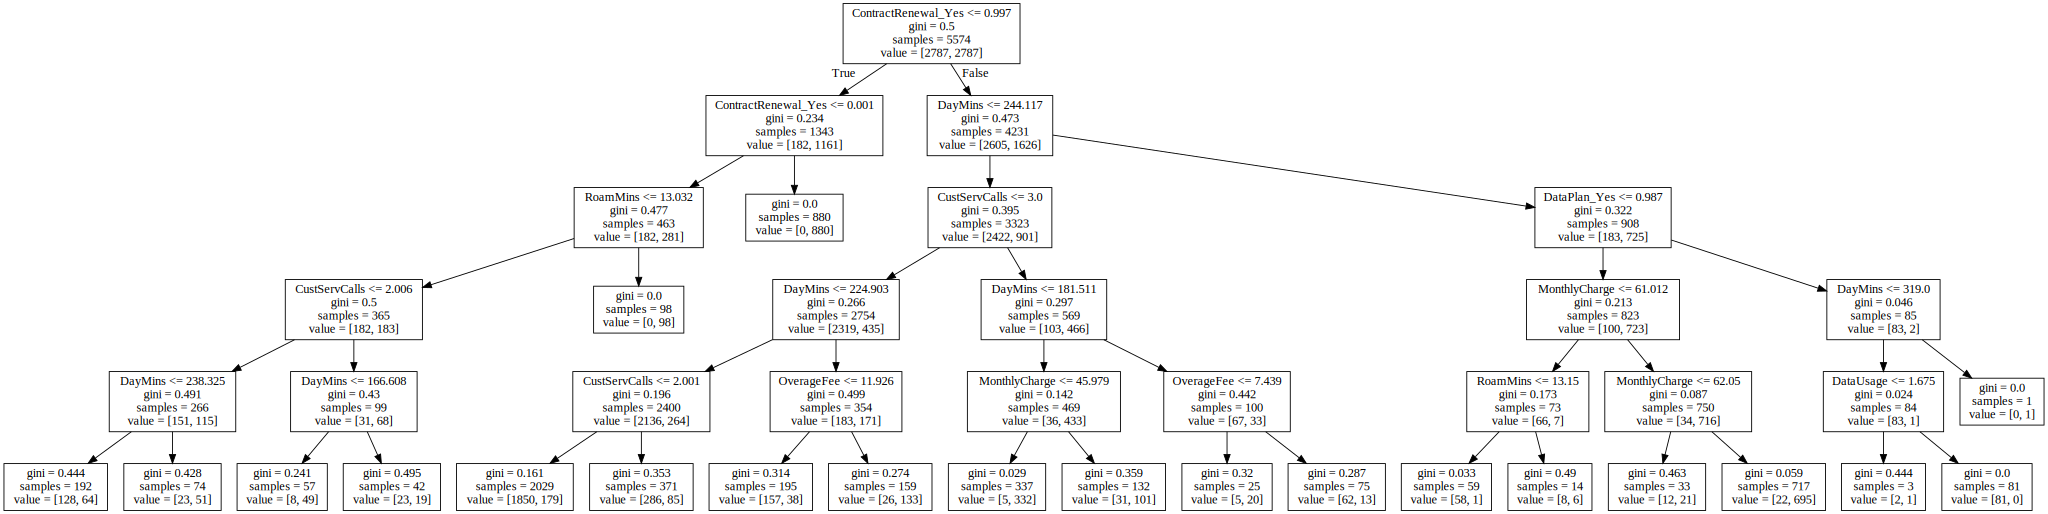

In [16]:
#@title

from sklearn import tree
import graphviz

feature_names = X.columns

tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)

In [17]:
#@title

from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(max_depth=2, random_state=0)


skl_cross_val = cross_val_score(rand_clf, X_oversampling, y_oversampling, cv=5, n_jobs=-1, scoring='roc_auc')

array_cross_val = skl_cross_val
mean_cross_val = skl_cross_val.mean()

print(f"Resultat CrossVal {array_cross_val} \nMoyenne CrossVal {mean_cross_val}")


Resultat CrossVal [0.9024874  0.93627054 0.93482269 0.94584725 0.93526651] 
Moyenne CrossVal 0.9309388772720203


In [18]:
#@title

rand_clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_oversampling, y_oversampling)

list_coeff, list_name_features = rand_clf.feature_importances_, X_oversampling.columns

fig = go.Figure([go.Bar(x=list_name_features, y=list_coeff)])
fig.show()


In [19]:
#@title

import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier()

skl_cross_val = cross_val_score(lgb_clf, X_oversampling, y_oversampling, cv=5, n_jobs=-1, scoring='roc_auc')

array_cross_val = skl_cross_val
mean_cross_val = skl_cross_val.mean()

print(f"Resultat CrossVal {array_cross_val} \nMoyenne CrossVal {mean_cross_val}")

Resultat CrossVal [0.93900697 0.99763196 0.99806632 0.99902833 0.99728927] 
Moyenne CrossVal 0.9862045714211909


In [20]:
#@title

lgb_clf = lgb.LGBMClassifier().fit(X_oversampling, y_oversampling)



list_coeff, list_name_features = lgb_clf.feature_importances_, X_oversampling.columns

fig = go.Figure([go.Bar(x=list_name_features, y=list_coeff)])
fig.show()
